# Upstream_polar.ipynb

- This notebook reproduces the following upstream-related figures in Guo et al. (2025).
    - Fig. 4(c)(d)
    - Fig. 6(a)(d)
    - Fig. 7(d)–(g)
    - Fig. 9(a)
    - Supplementary figures S11
- **Additional data reminder**:
    - Pre-calculated data have been saved in `/data/processed/demo_data`, so figures in this notebook can be reproduced without additional datasets.
    - If desired, pre-calculated data can be reproduced using:
        - TaiESM1 IVT (historical and ssp585): to be downloaded from Zenodo (doi:10.5281/zenodo.17199183)
        - TaiESM1 U, V, Q (historical)
        - ERA5 (2001–2019): to be downloaded from (https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics?tab=download)
- Execution order of cell sections for reproducing figures: 
    1. `Import`
    2. `Utilities`
    3. Each `Figure: ...`

# Import

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmaps
import seaborn.colors.xkcd_rgb as c

In [3]:
# --- self define modules --- #
import importlib
import sys
sys.path.append('../../src/main/')
import util_draw_polar
importlib.reload(util_draw_polar)

<module 'util_draw_polar' from '/data/ch995334/Multiscale-MoistDyn-Control/notebooks/main/../../src/main/util_draw_polar.py'>

# Utilities

## Data

In [4]:
df_up_polar = pd.read_csv('../../data/processed/weather_table_self/all_polar.csv')      # weather table w/ upstream IVT info.
wtab_all    = pd.read_csv('../../data/processed/weather_table_self/all_withlv.csv')     # weather table
swpcp_all   = pd.read_csv('../../data/processed/weather_table_self/swland_pcp_all.csv') # southwestern Taiwan rainfall
twpcp_all   = pd.read_csv('../../data/processed/weather_table_self/taiwan_pcp_all.csv') # Taiwan rainfall
swpcp_ratio = ((swpcp_all['accu'])/(twpcp_all['accu']))

In [5]:
# latent vectors for TaiESM1
lv_dict_taiesm = np.load('../../data/processed/fix_latent_vectors/V2_sum_lv_era5_taiesm.npy', allow_pickle=True).item()

### !! Data here has to be accessed separately

In [21]:
# TaiESM1 IVT
ds_hist = xr.open_dataset('IVT_reg_TaiESM1_historical.nc')
ivt_hist= ds_hist.sel(time=(ds_hist.time.dt.month >= 4) & (ds_hist.time.dt.month <= 9))
ds_ssp  = xr.open_dataset('IVT_reg_TaiESM1_ssp585.nc')
ivt_ssp = ds_ssp.sel(time=(ds_ssp.time.dt.month >= 4) & (ds_ssp.time.dt.month <= 9) & (ds_ssp.time.dt.year >= 2080))

In [35]:
path = f'TaiESM1'
ds_ta_hist = xr.open_mfdataset(f'{path}/historical/atmos/day/r1i1p1f1/ta_day*_gn_2*.nc')
ds_qv_hist = xr.open_mfdataset(f'{path}/historical/atmos/day/r1i1p1f1/hus_day*_gn_2*.nc')

In [37]:
ds_ua_hist = xr.open_mfdataset(f'{path}/historical/atmos/day/r1i1p1f1/ua_day*_gn_2*.nc')
ds_va_hist = xr.open_mfdataset(f'{path}/historical/atmos/day/r1i1p1f1/va_day*_gn_2*.nc')

In [60]:
# ERA5
ERA5_fpath = ''

## TaiwanVVM sim. dates

In [6]:
dlist_swsim = ['20140810', '20140813',
               '20150522', '20150524', '20150719', '20150720', '20150809', '20150828', '20150829', 
               '20160610', '20160611', '20160711', '20160712', '20160902',
               '20170602', '20170614', '20170615', '20170731',
               '20180617', '20180618', '20180619', '20180620', '20180701', '20180702', '20180815', '20180828',
               '20190611', '20190710', '20190810', '20190815']

In [7]:
dlist_atsim32 = ['20050702', '20050712', '20050723',
                 '20060623', '20060718', '20060721',
                 '20070830', 
                 '20080715',
                 '20090707', '20090817', '20090827',
                 '20100629', '20100630', '20100802', '20100803', '20100912',
                 '20110702', '20110723', '20110802', '20110816', '20110821',
                 '20120819',
                 '20130630', '20130703', '20130705', '20130723', '20130807', 
                 '20140703', '20140711', '20140714', '20140825', 
                 '20150613']
len(dlist_atsim32)

32

# Figure: IVT conditions (scatter)

In [8]:
def Plot_vvmsim_polar(sim:str, figtitle:str):
    # Load data
    df_up_polar['yyyymmdd'] = pd.to_datetime(df_up_polar['yyyymmdd'], format="%Y%m%d")
    # Figure
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection':'polar'})
    ax.grid(linestyle=':',linewidth=1, color='grey')
    util_draw_polar.draw_met_polar(ax)
    util_draw_polar.draw_sswf_sector(axe=ax)
    if sim == 'sw':
        dlist = pd.to_datetime(dlist_swsim, format="%Y%m%d")
        dcolor= c['bluish']
    elif sim == 'at':
        dlist = pd.to_datetime(dlist_atsim32, format="%Y%m%d")
        dcolor=c['burnt sienna']
    df_case = df_up_polar[df_up_polar['yyyymmdd'].isin(dlist)]
    ax.scatter(df_case['IVT_theta'], df_case['IVT_r'], s=150, color=dcolor, alpha=0.7)
    util_draw_polar.draw_met_polar_rticks(axe=ax, rmin=0, rmax=800, 
                                    ticks=np.arange(200, 800.1, 200), ticklabels=[f"{int(i)}" for i in np.arange(200, 800.1, 200)], tick_fs=13)
    ax.set_title(f'{figtitle}', loc='left', fontsize=20)
    plt.show()

## Fig. 6a & 6d (Upper panels)

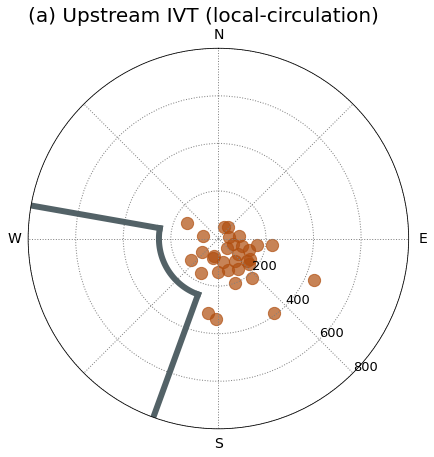

In [9]:
Plot_vvmsim_polar('at', figtitle='(a) Upstream IVT (local-circulation)')

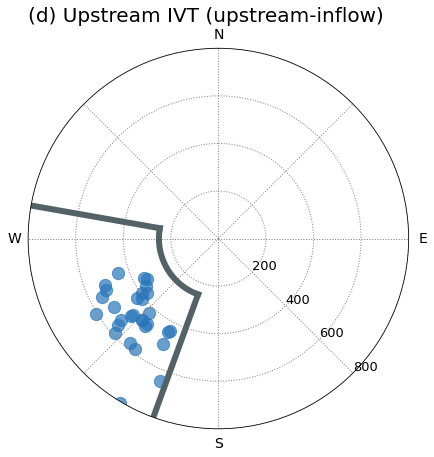

In [10]:
Plot_vvmsim_polar('sw', figtitle='(d) Upstream IVT (upstream-inflow)')

# Figure: IVT colored with precip.

In [11]:
def Plot_precip_polar(data_label:str, type_:str, figtitle:str, dotsize_ratio=1):
    df_up_polar['yyyymmdd'] = pd.to_datetime(df_up_polar['yyyymmdd'], format="%Y%m%d")
    # 6 regime
    cond0       = (wtab_all['ERA5_all_lv0']>=-4)&(wtab_all['ERA5_all_lv0']<2)
    cond1       = (wtab_all['ERA5_all_lv1']>=-4)&(wtab_all['ERA5_all_lv1']<0)
    # Type settings
    if type_ == 'fraction':
        projcolors= np.where(np.isnan(swpcp_ratio[cond0&cond1]), 0, swpcp_ratio[cond0&cond1])
        bounds_  = np.arange(0.35, 0.91, 0.025)
        color    = ['w', '#048DC3', '#02723E', '#DCB345', '#C27425', '#A92009']
        nodes    = np.linspace(0,1,len(color))
        cmap_    = colors.LinearSegmentedColormap.from_list("cmap", list(zip(nodes, color)))
        cmap_.set_under((0.8, 0.8, 0.8, 0.7))
        size_bounds = [.4, .6, .7, .8]                               # Define bounds for size categories
        tick_bounds = bounds_[2::4]
        tick_labels = [f"{i:.1f}" for i in bounds_[2::4]]
        cbar_label  = ''
    elif type_ == 'mean':
        projcolors= swpcp_all[cond0&cond1]['mean'].values
        bounds_  = np.array([1, 2, 6, 10, 15, 20, 30, 40, 50, 70, 90, 110, 130, 150, 200, 300])
        cmap_    = cmaps.WhiteBlueGreenYellowRed.copy()
        cmap_.set_under((0.8, 0.8, 0.8, 0.7))
        size_bounds = [15, 40, 100, 150]                              # Define bounds for size categories
        tick_bounds = bounds_
        tick_labels = bounds_
        cbar_label  = '(mm/day)'
    # Size settings
    dot_sizes = np.array([80, 100, 130, 160, 190])*dotsize_ratio  # Sizes corresponding to the bounds# Map color levels to dot sizes
    sizes = np.zeros_like(projcolors, dtype=int)
    for i, (low, high) in enumerate(zip(size_bounds[:-1], size_bounds[1:])):
        sizes[(projcolors >= low) & (projcolors < high)] = dot_sizes[i+1]
    sizes[projcolors <  size_bounds[0]] = dot_sizes[0]    # For the lowest category
    sizes[projcolors >= size_bounds[-1]] = dot_sizes[-1]  # For the highest category
    
    # Figure
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={'projection':'polar'})
    ax.grid(linestyle=':',linewidth=1, color='grey')
    util_draw_polar.draw_met_polar(ax)
    if type_ == 'fraction':
        util_draw_polar.draw_sswf_sector(axe=ax, ls=(0, (1, 1)), lc='black', alpha=0.65)
    elif type_== 'mean':
        util_draw_polar.draw_sswf_sector(axe=ax, lc='black', alpha=0.65)
    norm_    = colors.BoundaryNorm(bounds_, cmap_.N, extend='both')
    temp1    = np.argsort(projcolors)
    im = ax.scatter(df_up_polar[cond0&cond1]['IVT_theta'].iloc[temp1], df_up_polar[cond0&cond1]['IVT_r'].iloc[temp1], s=sizes[temp1], c=projcolors[temp1], alpha=0.65, cmap=cmap_, norm=norm_)
    util_draw_polar.draw_met_polar_rticks(axe=ax, rmin=0, rmax=800, 
                                    ticks=np.arange(200, 800.1, 200), ticklabels=[f"{int(i)}" for i in np.arange(200, 800.1, 200)], tick_fs=13)
    cax          = fig.add_axes([ax.get_position().x0, ax.get_position().y0-0.07, ax.get_position().width, 0.02])
    cbar         = fig.colorbar(im, orientation='horizontal', cax=cax)
    cbar.solids.set(alpha=1)
    cbar.set_ticks(ticks=tick_bounds, labels=tick_labels)
    if type_== 'fraction':
        cbar.ax.tick_params(labelsize=13)
    elif type_=='mean':
        cbar.ax.tick_params(labelsize=13, rotation=25)
    cbar.set_label(f'{cbar_label}', fontsize=13)
    cbar.outline.set_linewidth(1.5)
    ax.set_title(f'{figtitle}', loc='left', fontsize=18)
    plt.show()

## Fig. 4c & 4d

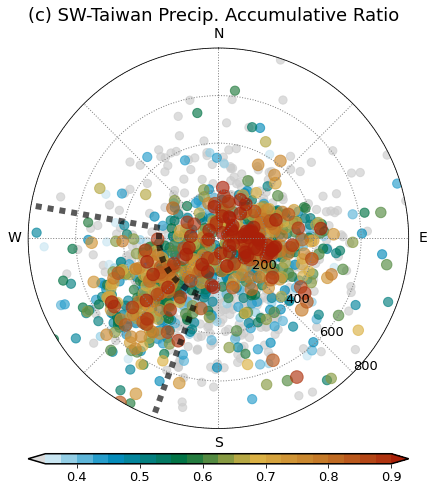

In [12]:
Plot_precip_polar(data_label='all', type_='fraction', figtitle='(c) SW-Taiwan Precip. Accumulative Ratio', dotsize_ratio=0.85)

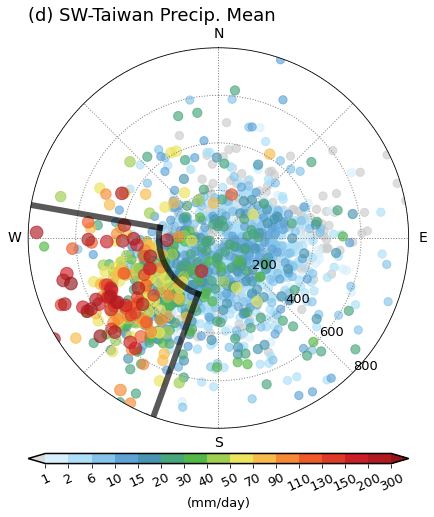

In [13]:
Plot_precip_polar(data_label='all', type_='mean', figtitle='(d) SW-Taiwan Precip. Mean', dotsize_ratio=0.85)

## Fig. 4 Inset

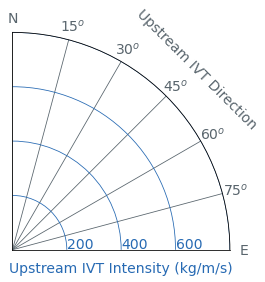

In [14]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(projection='polar')
ax.set_thetamin(0)
ax.set_thetamax(90)
ax.set_theta_zero_location("N")  # 0 degrees (north) at the top
ax.set_theta_direction(-1)       # Clockwise direction
ax.set_xticks(np.radians([0, 15, 30, 45, 60, 75, 90]))
ax.set_xticklabels(['N', r'$15^{o}$', r'$30^{o}$', r'$45^{o}$', r'$60^{o}$', r'$75^{o}$', 'E'], fontsize=14, c=c['slate grey'])
ax.text(45/180*np.pi, 630, 'Upstream IVT Direction', fontsize=14, rotation=-45, c=c['slate grey'])
ax.grid(axis='x', c=c['slate grey'])
ax.set_rmin(0)
ax.set_rmax(800)
ax.set_rticks(np.arange(0, 800.1, 200))
ax.set_yticklabels(['', '', '', '', ''])
ax.text(88.5/180*np.pi, 200, '200', fontsize=14, c=c['mid blue'])
ax.text(89/180*np.pi, 400, '400', fontsize=14, c=c['mid blue'])
ax.text(89.5/180*np.pi, 600, '600', fontsize=14, c=c['mid blue'])
ax.set_xlabel('Upstream IVT Intensity (kg/m/s)', fontsize=14, c=c['mid blue'])
ax.grid(axis='y', c=c['mid blue'])

# Figure: Upstream IVT wind rose (ERA5/TaiESM)

## Get IVT on polar coord. 
(Modified from create_polar_info.py)

In [15]:
def convert_to_dobj(date):
    """
    Convert a date (string/int) into a datetime object.
    Two types of string format are supported: 20051218 or 2005-12-18.
    """
    if isinstance(date, int) or isinstance(date, float):
        date = str(int(date))
        
    if isinstance(date, str):
        if len(date)>8:
            dateobj = datetime.strptime(date, '%Y-%m-%d')
        else:
            dateobj = datetime.strptime(date, '%Y%m%d')
    else:
        dateobj = date
    return dateobj

In [16]:
def Get_upstream_mean_IVT(ds_ivt:xr.Dataset, lon_range:tuple, lat_range:tuple):
    """
    Calculate the mean IVT for a specified region.
    """
    # Extract data
    ups_ivt   = ds_ivt.sel(lat=slice(*lat_range), lon=slice(*lon_range))
    ivt_xmean = ups_ivt.IVTx.mean(dim=['lat', 'lon']).values
    ivt_ymean = ups_ivt.IVTy.mean(dim=['lat', 'lon']).values
    ivt_mean  = ups_ivt.IVT_total.mean(dim=['lat', 'lon']).values
    return ivt_xmean, ivt_ymean, ivt_mean

In [17]:
def uv2polar_angle(u, v, radians=True):
    """
    Calculate the angle in (1) polar coordinate convention (2) meteorological convention from u- and v-wind.
    """
    # Polar coord.
    # if radians: return np.pi+np.arctan2(v, u)
    # else: return (180+np.arctan2(v, u)*180/np.pi)
    
    # Meteorology
    if radians: return (np.pi+np.arctan2(v, u))*(-1)+np.pi/2
    else: return ((180+np.arctan2(v, u)*180/np.pi))*(-1)+90

In [18]:
def Get_r_theta(ds_ivt:xr.Dataset, lon_range:tuple, lat_range:tuple, level=None):
    u, v, total = Get_upstream_mean_IVT(ds_ivt=ds_ivt, lon_range=lon_range, lat_range=lat_range)
    # Get r and theta
    windspeed, angle = total, uv2polar_angle(u, v)
    return windspeed, angle

### ERA5

In [19]:
polar_6reg  = df_up_polar[(wtab_all['ERA5_all_lv0']>=-4)&
                          (wtab_all['ERA5_all_lv0']<2)&
                          (wtab_all['ERA5_all_lv1']>=-4)&
                          (wtab_all['ERA5_all_lv1']<0)]

In [20]:
era5_polar_dict = {}
era5_polar_dict['r'], era5_polar_dict['angles'] = polar_6reg['IVT_r'].values, polar_6reg['IVT_theta'].values

### TaiESM1

In [21]:
def Extract_6reg_indices(lv_array:np.ndarray):
    cond_z0 = (lv_array[:, 0]>=-4)&(lv_array[:, 0]<2)   # z0
    cond_z1 = (lv_array[:, 1]>=-4)&(lv_array[:, 1]<0)   # z1
    return cond_z0&cond_z1

In [22]:
cond_6reg_hist = Extract_6reg_indices(lv_array=lv_dict_taiesm['TaiESM1(hist)'])
cond_6reg_ssp  = Extract_6reg_indices(lv_array=lv_dict_taiesm['TaiESM1(ssp)'][-(21*183):, :])

In [23]:
# hist_polar_dict    = {}
# hist_r, hist_theta = Get_r_theta(ds_ivt=ivt_hist, lon_range=(115, 119), lat_range=(20, 22))
# hist_polar_dict['r'], hist_polar_dict['angles']= hist_r[cond_6reg_hist], hist_theta[cond_6reg_hist]
# ssp_polar_dict     = {}
# ssp_r, ssp_theta   = Get_r_theta(ds_ivt=ivt_ssp, lon_range=(115, 119), lat_range=(20, 22))
# ssp_polar_dict['r'], ssp_polar_dict['angles']  = ssp_r[cond_6reg_ssp], ssp_theta[cond_6reg_ssp]

In [24]:
# np.save('../../data/processed/demo_data/TaiESM_IVT_polar_hist.npy', hist_polar_dict)
# np.save('../../data/processed/demo_data/TaiESM_IVT_polar_ssp.npy', ssp_polar_dict)

In [25]:
hist_polar_dict = np.load('../../data/processed/demo_data/TaiESM_IVT_polar_hist.npy', allow_pickle=True).item()
ssp_polar_dict  = np.load('../../data/processed/demo_data/TaiESM_IVT_polar_ssp.npy', allow_pickle=True).item()

### TaiESM1 CC-scaling

#### Load data

In [26]:
# qv_hist = ds_qv_hist.sel(time=(ds_qv_hist.time.dt.month>=4)&(ds_qv_hist.time.dt.month<=9), 
#                          lon=slice(66, 154), lat=slice(-15, 30)).isel(time=cond_6reg_hist)
# ua_hist = ds_ua_hist.sel(time=(ds_ua_hist.time.dt.month>=4)&(ds_ua_hist.time.dt.month<=9), 
#                          lon=slice(66, 154), lat=slice(-15, 30)).isel(time=cond_6reg_hist)
# va_hist = ds_va_hist.sel(time=(ds_va_hist.time.dt.month>=4)&(ds_va_hist.time.dt.month<=9), 
#                          lon=slice(66, 154), lat=slice(-15, 30)).isel(time=cond_6reg_hist)

#### Upstream IVT via +3K

In [27]:
# lev4d    = qv_hist.plev.expand_dims(dim={'time': 1}, axis=0).expand_dims(dim={'lat': 1}, axis=2).expand_dims(dim={'lon': 1}, axis=3)
# # Hist. upstream u, v, qv*1.21
# _hist_ua = ua_hist.sel(lon=slice(115, 120), lat=slice(20, 22)).ua
# _hist_va = va_hist.sel(lon=slice(115, 120), lat=slice(20, 22)).va
# _hist_qv = qv_hist.sel(lon=slice(115, 120), lat=slice(20, 22)).hus*1.21
# scaled_ivtu  = np.trapz(_hist_ua.sel(plev=slice(100000, 70000))*\
#                         _hist_qv.sel(plev=slice(100000, 70000)), 
#                         lev4d.sel(plev=slice(100000, 70000)), axis=1)/-9.8
# scaled_ivtv  = np.trapz(_hist_va.sel(plev=slice(100000, 70000))*\
#                         _hist_qv.sel(plev=slice(100000, 70000)), 
#                         lev4d.sel(plev=slice(100000, 70000)), axis=1)/-9.8
# scaled_ivt_total = np.sqrt(scaled_ivtu**2+scaled_ivtv**2)

In [28]:
# scaled_hist_polar_dict    = {}
# scaled_hist_polar_dict['r'], scaled_hist_polar_dict['angles']= scaled_ivt_total, uv2polar_angle(scaled_ivtu, scaled_ivtv)

In [29]:
# np.save('../../data/processed/demo_data/TaiESM_IVT_polar_CCscaled.npy', scaled_hist_polar_dict)

In [30]:
scaled_hist_polar_dict = np.load('../../data/processed/demo_data/TaiESM_IVT_polar_CCscaled.npy', allow_pickle=True).item()

## Polar bar plot

In [31]:
def Cal_polar_pdf(upstream_dict:dict, var_bound:list, angle_loc_rad:np.ndarray):
    """
    Example of `var_bound`: [0, 100, 300, 500] -> 0-100, 100-300, 300-500, >500
    Example of `angle_loc_rad`: np.arange(0, np.pi*2, np.pi/8)
    """
    # Data initialization
    if (angle_loc_rad[0]>0) or (angle_loc_rad[0]<0):
        raise ValueError("The first element of `angle_loc_rad` should be 0.")
    elif (var_bound[0]>0) or (var_bound[0]<0):
        raise ValueError("The first element of `var_bound` should be 0.")
    else:
        bin_width     = (angle_loc_rad[1]-angle_loc_rad[0])/2.
        polar_pdf     = dict(zip(var_bound, [np.zeros(angle_loc_rad.shape[0]) for i in range(len(var_bound))])) # {0: np.array([0, 0, 0, ..., 0])}
    r, angles = upstream_dict['r'], np.where(upstream_dict['angles']<0, upstream_dict['angles']+np.pi*2, upstream_dict['angles'])
    # Calculate pdf
    for i, lbd in enumerate(var_bound):
        if lbd == var_bound[-1]:  # the highest bin
            r_cond = r>=lbd
        else:
            r_cond = (r>=lbd) & (r<var_bound[i+1])
        for j, ang in enumerate(angle_loc_rad):
            if ang == 0:          # angle central == 0
                ang_cond = ((angles<=np.pi*2) & (angles>=np.pi*2-bin_width)) | ((angles>=0) & (angles<bin_width))
                # print(np.pi*2, np.pi*2-bin_width, 0, bin_width)
            else:
                ang_cond = (angles>=ang-bin_width) & (angles<ang+bin_width)
                # print(ang-bin_width, ang+bin_width)
            polar_pdf[lbd][j] = np.sum(r_cond&ang_cond)
    return polar_pdf

In [32]:
polarpdf_era5 = Cal_polar_pdf(era5_polar_dict, [0, 250, 500], np.arange(0, np.pi*2, np.pi/8))
polarpdf_hist = Cal_polar_pdf(hist_polar_dict, [0, 250, 500], np.arange(0, np.pi*2, np.pi/8))
polarpdf_ssp  = Cal_polar_pdf(ssp_polar_dict, [0, 250, 500], np.arange(0, np.pi*2, np.pi/8))

In [33]:
polarpdf_scaled_hist  = Cal_polar_pdf(scaled_hist_polar_dict, [0, 250, 500], np.arange(0, np.pi*2, np.pi/8))

In [34]:
def Plot_polar_barplot(polar_pdf:dict, angle_loc_rad:np.ndarray, figtitle:str):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection':'polar'})  # figsize changed from (8, 8)
    bounds_ = list(polar_pdf.keys())
    # Polar bar plot
    total_day = np.array(list(polar_pdf.values())).sum()
    bottom    = np.zeros(angle_loc_rad.shape[0])
    ColorList = ['#CFCBC4', '#A8D4E3', '#158BAD']
    for i, lbd in enumerate(bounds_):
        if lbd == bounds_[-1]:
            im    = ax.bar(angle_loc_rad, polar_pdf[lbd]/total_day*100, bottom=bottom, width=0.35, ec='k', color=ColorList[i], lw=1, label=fr'$\geq$ {lbd}')
        else:
            im    = ax.bar(angle_loc_rad, polar_pdf[lbd]/total_day*100, bottom=bottom, width=0.35, ec='k', color=ColorList[i], lw=1, label=f"{lbd:3d}{'-':^3}{bounds_[i+1]:>3}")
        bottom= bottom + polar_pdf[lbd]/total_day*100
    util_draw_polar.draw_met_polar(ax)
    util_draw_polar.draw_met_polar_rticks(axe=ax, rmax=25, rmin=0, 
                                    ticks=np.arange(5, 25.1, 5), ticklabels=[f"{int(i)} %" for i in np.arange(5, 25.1, 5)], label_pos=315)
    ax.legend(fontsize=14, loc=(0.75, 0), title='(kg/m/s)', title_fontsize=14)
    ax.set_title(f'{figtitle}', fontsize=16, loc='left')

### Fig. 7d–g

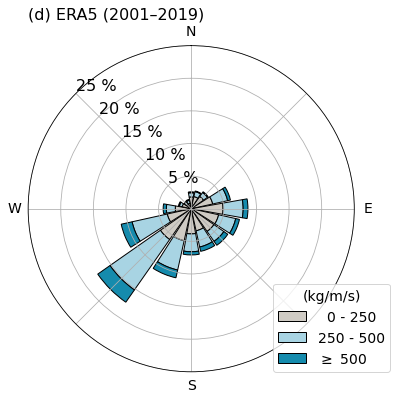

In [35]:
Plot_polar_barplot(polar_pdf=polarpdf_era5, angle_loc_rad=np.arange(0, np.pi*2, np.pi/8), 
                   figtitle='(d) ERA5 (2001–2019)')

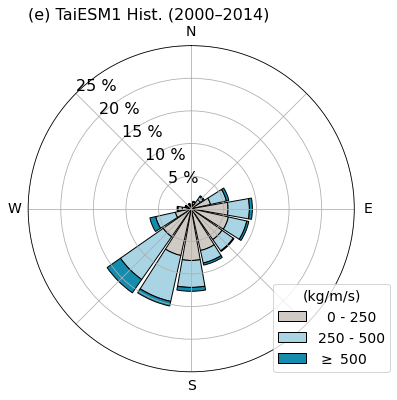

In [36]:
Plot_polar_barplot(polar_pdf=polarpdf_hist, angle_loc_rad=np.arange(0, np.pi*2, np.pi/8), 
                   figtitle='(e) TaiESM1 Hist. (2000–2014)')

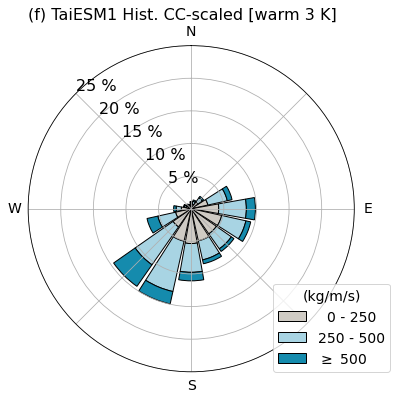

In [37]:
Plot_polar_barplot(polar_pdf=polarpdf_scaled_hist, angle_loc_rad=np.arange(0, np.pi*2, np.pi/8), 
                   figtitle='(f) TaiESM1 Hist. CC-scaled [warm 3 K]')

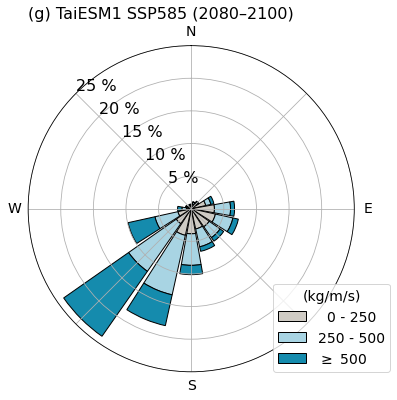

In [38]:
Plot_polar_barplot(polar_pdf=polarpdf_ssp, angle_loc_rad=np.arange(0, np.pi*2, np.pi/8), 
                   figtitle='(g) TaiESM1 SSP585 (2080–2100)')

# Figure: Upstream qv

In [39]:
def Get_upstream_qv_lev(upstream:str, level:float):
    wtab_6reg = wtab_all[(wtab_all['ERA5_all_lv0']>=-4)&\
                          (wtab_all['ERA5_all_lv0']<2)&\
                          (wtab_all['ERA5_all_lv1']>=-4)&\
                          (wtab_all['ERA5_all_lv1']<=0)]
    wtab_6reg['yyyymmdd'] = pd.to_datetime(wtab_6reg['yyyymmdd'], format='%Y%m%d')
    temp   = df_up_polar['IVT_theta'].where(df_up_polar['IVT_theta']>=0, df_up_polar['IVT_theta']+np.pi*2)
    swcond = (df_up_polar['IVT_r']>=250)&(temp>=200*np.pi/180)&(temp<=280*np.pi/180)
    if upstream == 'sw':
        matching_days = df_up_polar.loc[swcond, 'yyyymmdd']
        dlist_sw = wtab_6reg[wtab_6reg['yyyymmdd'].isin(matching_days)]['yyyymmdd']
        dlist_sw = pd.to_datetime(dlist_sw, format="%Y%m%d").to_list()
    elif upstream == 'at':
        matching_days = df_up_polar.loc[~swcond, 'yyyymmdd']
        dlist_at = wtab_6reg[wtab_6reg['yyyymmdd'].isin(matching_days)]['yyyymmdd']
        dlist_at = pd.to_datetime(dlist_at, format="%Y%m%d").to_list()
    # Extract u, v, q
    qlev    = []
    for dobj in eval(f'dlist_{upstream}'):
        ds_q= xr.open_dataset(f'{ERA5_fpath}/q/{dobj.year}/ERA5_PRS_q_{dobj.year}{dobj.month:02d}_r1440x721_day.nc')
        qlev.append(ds_q.q.sel(time=dobj, level=level, longitude=118.5, latitude=21.5, method='nearest').data)
    return eval(f'dlist_{upstream}'), np.asarray(qlev)

In [40]:
# dict_qlev = {}
# for upstream in ['sw', 'at']:
#     for lev in [1000, 925, 850, 700]:
#         dict_qlev[f'{upstream}_datelist'], dict_qlev[f'{upstream}_{int(lev)}mb'] = Get_upstream_qv_lev(upstream, lev)

In [41]:
# np.save('../../data/processed/demo_data/upstream_low_lev_qv.npy', dict_qlev)

In [42]:
dict_qlev = np.load('../../data/processed/demo_data/upstream_low_lev_qv.npy', allow_pickle=True).item()

In [43]:
def Plot_upstream_box(level:float, plot_upstream=False, plot_vvmsim=False, box_xlim=(0.004, 0.018), figsize=(4, .6)):
    # Figure initialize
    fig, ax1 = plt.subplots(figsize=figsize)
    # upstream samples
    if plot_upstream:
        medianprops = dict(linestyle='-', linewidth=1.3, color='k')
        boxprops    = dict(linestyle='-', linewidth=1.3, color='k')
        whiskerprops= dict(linestyle='-', linewidth=1.3, color='k')
        capprops    = dict(linestyle='-', linewidth=1.3, color='k')
        if plot_upstream == 'sw':
            dlist_sw = dict_qlev['sw_datelist']
            qlev_sw  = dict_qlev[f'sw_{level}mb']
            ax1.boxplot(qlev_sw, vert=False, sym='k+', widths=.7, 
                        medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops)
        elif plot_upstream == 'at':
            dlist_at = dict_qlev['at_datelist']
            qlev_at  = dict_qlev[f'at_{level}mb']
            ax1.boxplot(qlev_at, vert=False, sym='k+', widths=.7, 
                        medianprops=medianprops, boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops)
    # vvm sim. samples
    if plot_vvmsim:
        if plot_vvmsim == 'sw':
            dlist_vvm_sw = pd.to_datetime(dlist_swsim, format="%Y%m%d").to_list()
            qlev_vvm_sw  = [dict_qlev[f'sw_{level}mb'][i] \
                            for i in range(len(dict_qlev['sw_datelist'])) \
                                           if dict_qlev['sw_datelist'][i] in dlist_vvm_sw]
            ax1.scatter(qlev_vvm_sw, np.ones(len(dlist_vvm_sw)), s=35, color=c['bluish'], alpha=0.35, zorder=10)
        if plot_vvmsim == 'at':
            dlist_vvm_at = pd.to_datetime(dlist_atsim32, format="%Y%m%d").to_list()
            qlev_vvm_at  = [dict_qlev[f'at_{level}mb'][i] \
                            for i in range(len(dict_qlev['at_datelist'])) \
                                           if dict_qlev['at_datelist'][i] in dlist_vvm_at]
            ax1.scatter(qlev_vvm_at, np.ones(len(dlist_vvm_at)), s=35, color=c['burnt sienna'], alpha=0.35, zorder=10)
    
    ax1.grid(linestyle=':', linewidth=0.5, color='grey', axis='x')
    ax1.set_xlim(box_xlim)
    ax1.set_xticks(np.arange(box_xlim[0], box_xlim[1]+0.001, 0.002))
    ax1.set_xticklabels((np.arange(box_xlim[0], box_xlim[1]+0.001, 0.002)*1000).astype(int))
    ax1.set(yticklabels=[])  # remove the tick labels
    ax1.tick_params(left=False)  # remove the ticks
    ax1.set_title(f"qv (g/kg) @ {int(level)} hPa", loc='left', fontsize=10)
    plt.show()

## Fig. 6a & 6d (bottom panels)

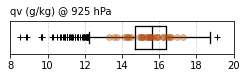

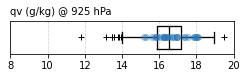

In [44]:
Plot_upstream_box(level=925, plot_upstream='at', plot_vvmsim='at', box_xlim=(0.008, 0.02))
Plot_upstream_box(level=925, plot_upstream='sw', plot_vvmsim='sw', box_xlim=(0.008, 0.02))

## Fig. S11 

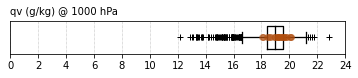

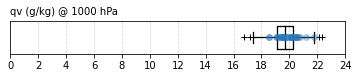

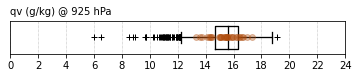

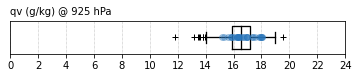

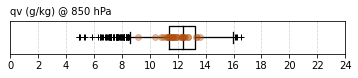

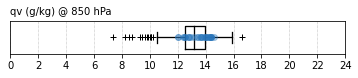

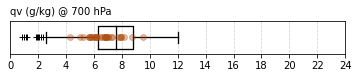

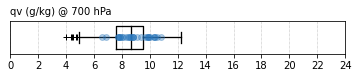

In [45]:
for lev in [1000, 925, 850, 700]:
    for sim in ['at', 'sw']:
        Plot_upstream_box(level=lev, plot_upstream=sim, plot_vvmsim=sim, box_xlim=(0, 0.024), figsize=(6, .6))

## Fig. 9a

In [46]:
def Get_IVTdir_925qv_ws(IVT_dir_degree:float, tolerance_degree:float):
    # Load data
    df_up_polar['yyyymmdd'] = pd.to_datetime(df_up_polar['yyyymmdd'], format="%Y%m%d")
    temp   = df_up_polar['IVT_theta'].where(df_up_polar['IVT_theta']>=0, df_up_polar['IVT_theta']+np.pi*2)
    # Specified IVT direction range
    if (IVT_dir_degree-tolerance_degree) < 200:
        raise ValueError(f"Min. IVT direction should be >= 200 (degree). Current input: {IVT_dir_degree-tolerance_degree}")
    elif (IVT_dir_degree+tolerance_degree) > 280:
        raise ValueError(f"Max. IVT direction should be <= 280 (degree). Current input: {IVT_dir_degree+tolerance_degree}")
    else:
        dir_cond = (temp>=(IVT_dir_degree-tolerance_degree)*np.pi/180)&(temp<=(IVT_dir_degree+tolerance_degree)*np.pi/180)
    # Date list matching the given IVT direction range
    wtab_6reg = wtab_all[(wtab_all['ERA5_all_lv0']>=-4)&\
                         (wtab_all['ERA5_all_lv0']<2)&\
                         (wtab_all['ERA5_all_lv1']>=-4)&\
                         (wtab_all['ERA5_all_lv1']<=0)]
    wtab_temp = wtab_6reg.copy()
    matching_days = df_up_polar.loc[dir_cond, 'yyyymmdd']
    wtab_temp['yyyymmdd'] = pd.to_datetime(wtab_6reg['yyyymmdd'], format="%Y%m%d")
    dlist_dir     = wtab_temp[wtab_temp['yyyymmdd'].isin(matching_days)]['yyyymmdd']
    dlist_dir     = pd.to_datetime(dlist_dir, format="%Y%m%d").to_list()
    # Extract u, v, q
    u, v, q       = [], [], []
    for dobj in dlist_dir:
        ds_u      = xr.open_dataset(f'{ERA5_fpath}/u/{dobj.year}/ERA5_PRS_u_{dobj.year}{dobj.month:02d}_r1440x721_day.nc')
        u.append(ds_u.u.sel(time=dobj, level=925, longitude=118.5, latitude=21.5, method='nearest').data)
        ds_v      = xr.open_dataset(f'{ERA5_fpath}/v/{dobj.year}/ERA5_PRS_v_{dobj.year}{dobj.month:02d}_r1440x721_day.nc')
        v.append(ds_v.v.sel(time=dobj, level=925, longitude=118.5, latitude=21.5, method='nearest').data)
        ds_q      = xr.open_dataset(f'{ERA5_fpath}/q/{dobj.year}/ERA5_PRS_q_{dobj.year}{dobj.month:02d}_r1440x721_day.nc')
        q.append(ds_q.q.sel(time=dobj, level=925, longitude=118.5, latitude=21.5, method='nearest').data)
    ulev_dir, vlev_dir, qlev_dir = np.asarray(u), np.asarray(v), np.asarray(q)
    return ulev_dir, vlev_dir, qlev_dir, dlist_dir

In [47]:
# dict_uvq = {'IVT_dir_degree':230, 'IVT_tol_degree':2.5}
# dict_uvq['u'], dict_uvq['v'], dict_uvq['q'], dict_uvq['datelist'] = Get_IVTdir_925qv_ws(IVT_dir_degree=dict_uvq['IVT_dir_degree'], 
#                                                                                         tolerance_degree=dict_uvq['IVT_tol_degree'])
# np.save('../../data/processed/925uvq_upstream_IVT230.npy', dict_uvq)

In [49]:
dict_uvq = np.load('../../data/processed/demo_data/925uvq_upstream_IVT230.npy', allow_pickle=True).item()

In [50]:
def Plot_IVTdir_925qv_ws(IVT_dir_degree:float, tolerance_degree:float):
    # Load data
    ulev_dir, vlev_dir, qlev_dir = dict_uvq['u'], dict_uvq['v'], dict_uvq['q']
    wslev_dir     = np.sqrt(ulev_dir**2+vlev_dir**2)
    swpcp_temp= swpcp_all.copy()
    swpcp_temp['yyyymmdd'] = pd.to_datetime(swpcp_all['yyyymmdd'], format="%Y%m%d")
    swpcp_dir     = swpcp_all[swpcp_temp['yyyymmdd'].isin(dict_uvq['datelist'])]['mean'].values
    # Figure
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.grid(linestyle=':',linewidth=1, color='grey')
    bounds  = np.array([1, 2, 6, 10, 15, 20, 30, 40, 50, 70, 90, 110, 130, 150, 200, 300])
    cmap    = cmaps.WhiteBlueGreenYellowRed.copy()
    cmap.set_under((0.8, 0.8, 0.8, 0.7))
    norm    = colors.BoundaryNorm(bounds, cmap.N, extend='both')
    temp    = np.argsort(swpcp_dir)
    im      = ax.scatter(wslev_dir[temp], qlev_dir[temp], s=180, c=swpcp_dir[temp], alpha=0.7, cmap=cmap, norm=norm)
    cbar_label = '(mm/day)'
    cax     = fig.add_axes([ax.get_position().x1+0.03, ax.get_position().y0, 0.025, ax.get_position().height])
    cbar    = fig.colorbar(im, orientation='vertical', cax=cax)
    cbar.solids.set(alpha=1)
    cbar.set_ticks(ticks=bounds, labels=bounds.astype(int))
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(cbar_label, fontsize=14)
    cbar.outline.set_linewidth(1.5)
    
    ax.set_xlabel('925 hPa Wind Speed (m/s)', fontsize=16)
    ax.set_ylabel('925 hPa qv (kg/kg)', fontsize=16)
    ax.set_xlim(0.8, 21.5)
    ax.set_ylim(0.0095, 0.0185)
    ax.set_xticks(np.arange(2.5, 21.5, 2.5))
    ax.set_xticklabels([f'{i:.1f}' for i in np.arange(2.5, 21.5, 2.5)], fontsize=16)
    ax.set_yticks(np.arange(0.01, 0.019, 0.002))
    ax.set_yticklabels([f'{i:.3f}' for i in np.arange(0.01, 0.019, 0.002)], fontsize=16)
    nl = '\n'
    ax.set_title(fr'(a) Conditioned on IVT degree range: {int(IVT_dir_degree)} $\pm$ {tolerance_degree:.1f}', 
                 loc='left', fontsize=16)
    plt.savefig(f'/data/ch995334/SSWF_proj/Figure/precip_proj/all_925qvws_swpcp2.png', facecolor='w', bbox_inches='tight', dpi=400)
    plt.show()

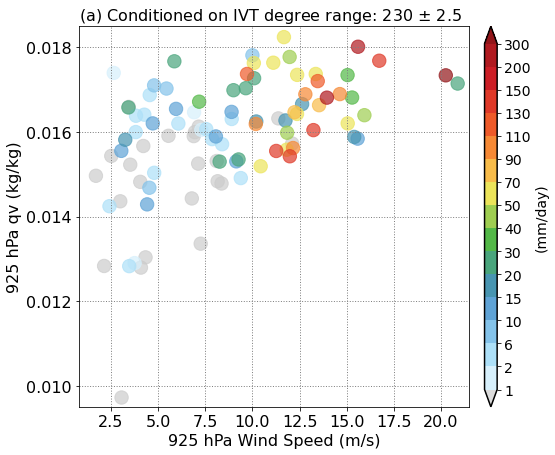

In [51]:
Plot_IVTdir_925qv_ws(IVT_dir_degree=230, tolerance_degree=2.5)